In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_main = pd.read_csv(r'kidney_disease_dataset.csv')

In [4]:
df_main['Target'].value_counts()

,count
Target,
No_Disease,16432
Low_Risk,2054
Moderate_Risk,821
High_Risk,821
Severe_Disease,410


In [5]:
df_noRisk = df_main[df_main['Target'] == 'No_Disease'].sample(n=410, random_state=42)
df_lowRisk = df_main[df_main['Target'] == 'Low_Risk'].sample(n=410, random_state=42)
df_Moderate_Risk = df_main[df_main['Target'] == 'Moderate_Risk'].sample(n=410, random_state=42)

df_High_Risk = df_main[df_main['Target'] == 'High_Risk'].sample(n=410, random_state=42)

df_Severe_Disease = df_main[df_main['Target'] == 'Severe_Disease'].sample(n=410, random_state=42)


df_equal = pd.concat([df_noRisk,df_lowRisk,df_Moderate_Risk,df_High_Risk,df_Severe_Disease], ignore_index=True)


df_equal = df_equal.sample(frac=1, random_state=44).reset_index(drop=True)


df_equal.to_csv('equal_data.csv', index=False)

In [6]:
df_equal['Target'].value_counts()

,count
Target,
High_Risk,410
No_Disease,410
Severe_Disease,410
Moderate_Risk,410
Low_Risk,410


In [7]:
object_columns = [
    'Red blood cells in urine', 'Pus cells in urine', 'Pus cell clumps in urine', 'Bacteria in urine',
    'Hypertension (yes/no)', 'Diabetes mellitus (yes/no)', 'Coronary artery disease (yes/no)',
    'Appetite (good/poor)', 'Pedal edema (yes/no)', 'Anemia (yes/no)',
    'Family history of chronic kidney disease', 'Smoking status',
    'Physical activity level', 'Urinary sediment microscopy results','Target'
]


df_object_only = df_equal[object_columns]

In [8]:
df_objects_encoded = pd.get_dummies(df_object_only.drop(columns=['Target'], errors='ignore'), drop_first=True)

In [9]:
df_objects_encoded.head()

,Red blood cells in urine_normal,Pus cells in urine_normal,Pus cell clumps in urine_present,Bacteria in urine_present,Hypertension (yes/no)_yes,Diabetes mellitus (yes/no)_yes,Coronary artery disease (yes/no)_yes,Appetite (good/poor)_poor,Pedal edema (yes/no)_yes,Anemia (yes/no)_yes,Family history of chronic kidney disease_yes,Smoking status_yes,Physical activity level_low,Physical activity level_moderate,Urinary sediment microscopy results_normal
0,False,False,False,True,True,False,False,True,True,False,False,True,False,True,False
1,True,True,True,False,True,False,True,False,True,True,False,False,False,False,True
2,True,False,True,False,False,False,False,False,False,False,True,False,True,False,False
3,True,False,True,False,False,False,False,False,True,False,False,False,False,True,True
4,False,False,True,False,True,True,False,False,True,True,False,True,False,False,True


In [10]:
target_mapping = {
    'No_Disease': 0,
    'Low_Risk': 1,
    'Moderate_Risk': 2,
    'Severe_Disease': 3,
    'High_Risk': 4
}

df_objects_encoded['Target'] = df_equal['Target'].map(target_mapping)

In [11]:
df_objects_encoded.head()

,Red blood cells in urine_normal,Pus cells in urine_normal,Pus cell clumps in urine_present,Bacteria in urine_present,Hypertension (yes/no)_yes,Diabetes mellitus (yes/no)_yes,Coronary artery disease (yes/no)_yes,Appetite (good/poor)_poor,Pedal edema (yes/no)_yes,Anemia (yes/no)_yes,Family history of chronic kidney disease_yes,Smoking status_yes,Physical activity level_low,Physical activity level_moderate,Urinary sediment microscopy results_normal,Target
0,False,False,False,True,True,False,False,True,True,False,False,True,False,True,False,4
1,True,True,True,False,True,False,True,False,True,True,False,False,False,False,True,0
2,True,False,True,False,False,False,False,False,False,False,True,False,True,False,False,3
3,True,False,True,False,False,False,False,False,True,False,False,False,False,True,True,0
4,False,False,True,False,True,True,False,False,True,True,False,True,False,False,True,3


Accuracy: 0.19
[[19 32 25 23 36]
 [21 26 20 29 24]
 [20 24 22 23 32]
 [23 36 21 22 23]
 [17 30 26 16 25]]
              precision    recall  f1-score   support

           0       0.19      0.14      0.16       135
           1       0.18      0.22      0.19       120
           2       0.19      0.18      0.19       121
           3       0.19      0.18      0.18       125
           4       0.18      0.22      0.20       114

    accuracy                           0.19       615
   macro avg       0.19      0.19      0.18       615
weighted avg       0.19      0.19      0.18       615



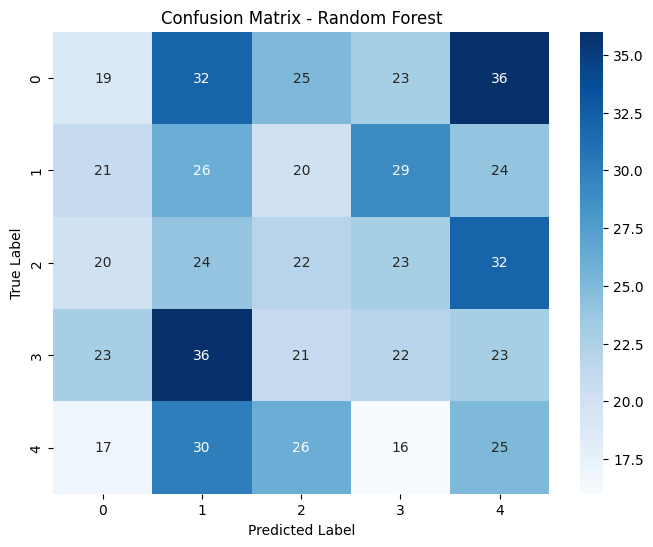

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = df_objects_encoded.drop('Target', axis=1)
y = df_objects_encoded['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print(f"Accuracy: {model.score(X_test, y_test):.2f}")

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


y_pred = model.predict(X_test)


cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [14]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

 XGBoost Accuracy: 0.1983739837398374
[[22 30 28 23 32]
 [19 25 30 27 19]
 [24 23 18 21 35]
 [20 27 24 30 24]
 [17 26 22 22 27]]
              precision    recall  f1-score   support

           0       0.22      0.16      0.19       135
           1       0.19      0.21      0.20       120
           2       0.15      0.15      0.15       121
           3       0.24      0.24      0.24       125
           4       0.20      0.24      0.22       114

    accuracy                           0.20       615
   macro avg       0.20      0.20      0.20       615
weighted avg       0.20      0.20      0.20       615



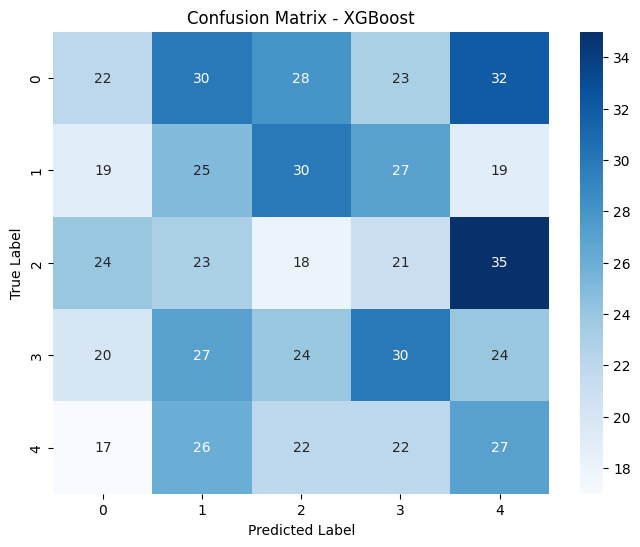

In [15]:
y_pred_xgb = xgb_model.predict(X_test)
print(" XGBoost Accuracy:", xgb_model.score(X_test, y_test))
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues',
            xticklabels=xgb_model.classes_, yticklabels=xgb_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - XGBoost')
plt.show()

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [18]:
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Accuracy:", dt_model.score(X_test, y_test))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.2048780487804878
[[25 30 25 27 28]
 [25 26 26 25 18]
 [23 28 16 24 30]
 [24 17 25 27 32]
 [19 26 18 19 32]]
              precision    recall  f1-score   support

           0       0.22      0.19      0.20       135
           1       0.20      0.22      0.21       120
           2       0.15      0.13      0.14       121
           3       0.22      0.22      0.22       125
           4       0.23      0.28      0.25       114

    accuracy                           0.20       615
   macro avg       0.20      0.21      0.20       615
weighted avg       0.20      0.20      0.20       615

